<table>
<tr>
<td width=15%><img src="https://www.nitrkl.ac.in/assets/images/logo.png"></img></td>
<td><center><h1>National Institute of Technology
Rourkela, Odisha, India, 769008</h1><h2>Department of Computer Science Engineering</h2></center></td>
</tr>
<tr><td colspan=2><center><h3>Laborotary-4</h3></br>
            <b>(Data Science Laborotary)</b></center></td></tr>
</table>

## Linear Regression

Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the salary dataset

In [3]:
# your answer here
salary_dataset = pd.read_csv("Salary_Data.csv")

Show the first 10 rows of the dataset

In [5]:
# your answer here
salary_dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Show the dimensions (No. of rows and coulmns) of the dataset

In [7]:
# your answer here
rows = salary_dataset.shape[0]
columns = salary_dataset.shape[1]

print(f'Number of Rows : {rows} & Number of Columns : {columns}')

Number of Rows : 30 & Number of Columns : 2


Print all the column names of the dataset

In [9]:
# your answer here
for column in salary_dataset.columns:
    print(column)

YearsExperience
Salary


Print general information of the dataset like column, and datatype.

In [10]:
# your answer here
salary_dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

Extract independent and dependent features and store it in two different variables.

In [54]:
# your answer here
#taking Year of Experience as Independent feature and Salary as dependent feature
X = salary_dataset.drop('Salary', axis=1)  
y = salary_dataset['Salary']

Split the dataset into train and test set

In [12]:
from sklearn.model_selection import train_test_split

In [72]:
# your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y)

Training the Simple Linear Regression model on the Training set

In [22]:
from sklearn.linear_model import LinearRegression


In [73]:
# your answer here
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predict the Test set results

In [74]:
# your answer here
y_pred = model.predict(X_test)

Visualize the linear regression on training data using scatterplot.

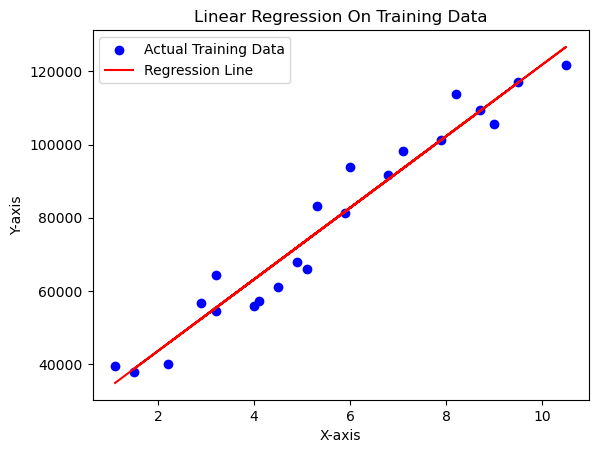

In [26]:
# your answer here
plt.scatter(X_train, y_train, color='b', label='Actual Training Data')
plt.plot(X_train, model.predict(X_train), color='r', label='Regression Line')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Linear Regression On Training Data')
plt.show()

Visualize the linear regression on test data using scatterplot.

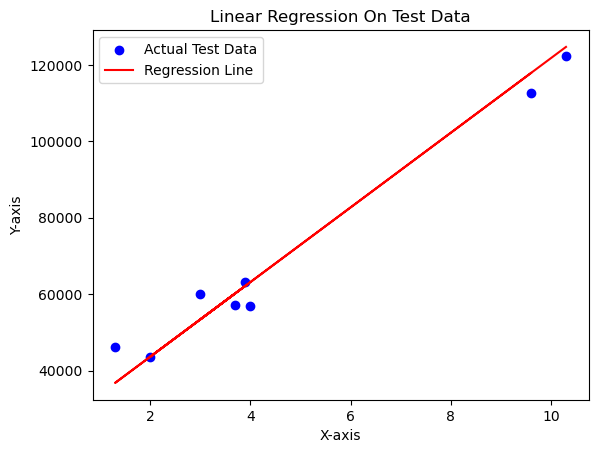

In [27]:
# your answer here
plt.scatter(X_test, y_test, color='b', label='Actual Test Data')
plt.plot(X_test, y_pred, color='r', label='Regression Line')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Linear Regression On Test Data')
plt.show()

Finding R^2 score

In [29]:
from sklearn.metrics import r2_score

In [75]:
# your answer here
r2 = r2_score(y_test, y_pred)
print("The r2 score for the  Linear Regression is : ", r2)

The r2 score for the  Linear Regression is :  0.9660801523261165


## Ridge Regression

In [76]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
for i, col in enumerate(X_train.columns):   
    print(f"Ridge model coefficient for {col} is {ridge.coef_[i]:.4f}")

y_pred = ridge.predict(X_test)

Ridge model coefficient for YearsExperience is 9316.2426


In [77]:
r2 = r2_score(y_test, y_pred)
print("The r2 score for the  Ridge Regression is : ", r2)

The r2 score for the  Ridge Regression is :  0.9659523455555573


## Lasso Regression

In [78]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print(f"Lasso model coefficient for {col} is {lasso.coef_[i]:.4f}")

y_pred = lasso.predict(X_test)

Lasso model coefficient for YearsExperience is 9337.3433


In [79]:
r2 = r2_score(y_test, y_pred)
print("The r2 score for the  Lasso Regression is : ", r2)

The r2 score for the  Lasso Regression is :  0.9660800561117484


## Huber Regression

In [80]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor()
huber.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print(f"Huber model coefficient for {col} is {huber.coef_[i]:.4f}")

y_pred = huber.predict(X_test)

Huber model coefficient for YearsExperience is 9354.0319


In [81]:
r2 = r2_score(y_test, y_pred)
print("The r2 score for the  Huber Regression is : ", r2)

The r2 score for the  Huber Regression is :  0.9663901791940933


### R2 scores 
- Linear Regression is :  0.9660801523261165
- Ridge Regression is :  0.9659523455555573
- Lasso Regression is :  0.9660800561117484
- Huber Regression is :  0.9663901791940933

Huber Regresion has best R2 score

## Logistic Regression

Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Read the heart failure dataset

In [32]:
# your answer here
heart_dataset = pd.read_csv("heart.csv")

Display the first five rows


In [33]:
# your answer here
heart_dataset.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Check for missing values

In [36]:
# your answer here
missing_values = heart_dataset.isnull().sum()
print("Missing values in each column:")
print(missing_values)
if heart_dataset.isnull().values.any():
    print("\nThe dataset contains missing values.")
else:
    print("\nThe dataset does not contain any missing values.")

Missing values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The dataset does not contain any missing values.


Describe numerical features

In [38]:
# your answer here
numerical_features = heart_dataset.select_dtypes(include=[np.number])
description = numerical_features.describe()
print(description)

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


Visualize the distribution of key features (Age, Cholesterol, MaxHR) using histograms.

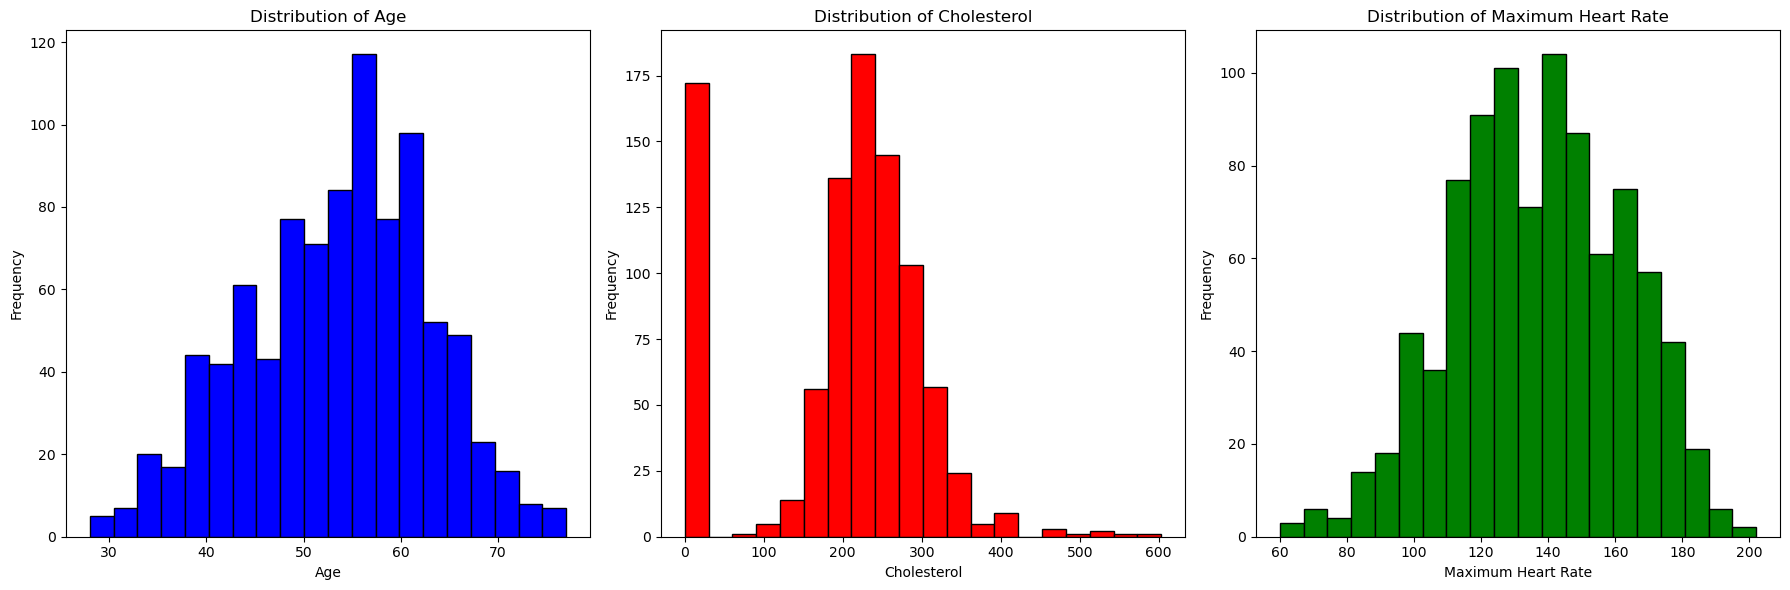

In [52]:
# your answer here
plt.style.use('default')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for Age
ax1.hist(heart_dataset['Age'], bins=20, color='blue', edgecolor = 'black')
ax1.set_title('Distribution of Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')

# Histogram for Cholesterol
ax2.hist(heart_dataset['Cholesterol'], bins=20, color='red', edgecolor = 'black')
ax2.set_title('Distribution of Cholesterol')
ax2.set_xlabel('Cholesterol')
ax2.set_ylabel('Frequency')

# Histogram for MaxHR
ax3.hist(heart_dataset['MaxHR'], bins=20, color='green', edgecolor = 'black')
ax3.set_title('Distribution of Maximum Heart Rate')
ax3.set_xlabel('Maximum Heart Rate')
ax3.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

List all categorical_features

In [45]:
# your answer here
categorical_features = heart_dataset.select_dtypes(exclude=["number"])
print(categorical_features)

    Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0     M           ATA     Normal              N       Up
1     F           NAP     Normal              N     Flat
2     M           ATA         ST              N       Up
3     F           ASY     Normal              Y     Flat
4     M           NAP     Normal              N       Up
..   ..           ...        ...            ...      ...
913   M            TA     Normal              N     Flat
914   M           ASY     Normal              N     Flat
915   M           ASY     Normal              Y     Flat
916   F           ATA        LVH              N     Flat
917   M           NAP     Normal              N       Up

[918 rows x 5 columns]


Convert categorical variables into numerical format using label encoding.

In [47]:
# your answer here
from sklearn.preprocessing import LabelEncoder

heart_dataset_encoded = heart_dataset.copy()

le = LabelEncoder()

for column in categorical_features.columns:
    heart_dataset_encoded[column] = le.fit_transform(heart_dataset_encoded[column])

print(heart_dataset_encoded.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


Analyze the correlation between features using a heatmap.

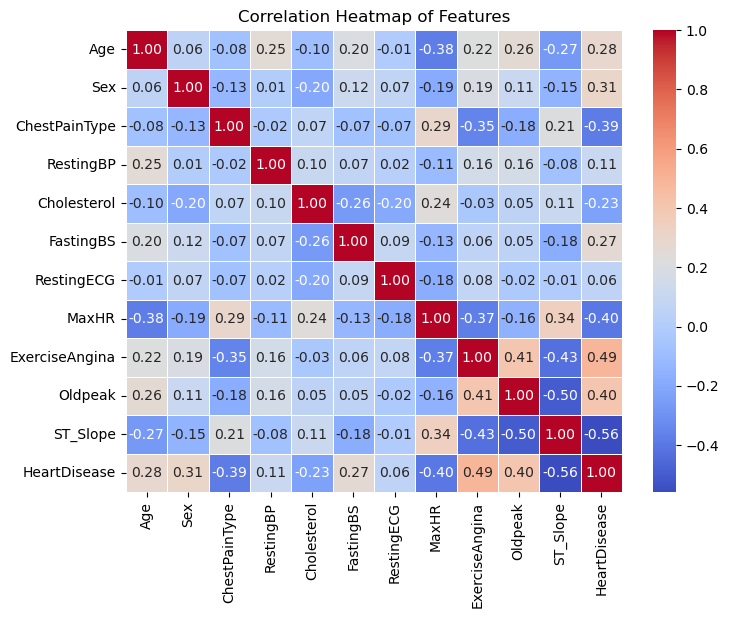

In [61]:
# your answer here
correlation_matrix = heart_dataset_encoded.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
 
plt.title('Correlation Heatmap of Features')
 
plt.show()

Split the dataset into training and testing sets (80-20 split).

In [82]:
# your answer here
from sklearn.model_selection import train_test_split

X = heart_dataset_encoded.drop('HeartDisease', axis=1)  
y = heart_dataset_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Perform hyperparameter tuning on logistic regression using GridSearchCV to find the best parameters

In [83]:
# your answer here
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='saga', tol=0.1))

param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(pipe, param_grid, cv=5)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1'}
Best Score: 0.8223924922784509


Train the logistic regression model using the best parameters obtained from GridSearchCV and evaluate its performance on the test set using accuracy, confusion matrix, and classification report.

In [84]:
# your answer here
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


best_params = {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1'}

pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        C=best_params['logisticregression__C'],
        penalty=best_params['logisticregression__penalty'],
        solver='liblinear',  # 'liblinear' is compatible with l1 penalty
        max_iter=1000,
        tol=0.1
    )
)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8261
Confusion Matrix:
[[68  9]
 [23 84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        77
           1       0.90      0.79      0.84       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.82       184
weighted avg       0.84      0.83      0.83       184



In [29]:
from sklearn.metrics import roc_curve, auc

In [30]:
# your answer here